# Assignment 3: Final Project

## Dataset Used:

1. Library Card Registrations (https://open.toronto.ca/dataset/library-card-registrations/)
2. Library Branch General Information (https://open.toronto.ca/dataset/library-branch-general-information/)

Source: Open Data Toronto (https://open.toronto.ca/catalogue/)

## Public Library Engagement: How Programs Influence Registration Numbers

In [1]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Importing CSV Files

In [2]:
# Load library information dataset
library_info_df = pd.read_csv("../assignment-3_files/tpl-branch-general-information-2023.csv")

# Load annual library registration dataset
library_registration_df = pd.read_csv("../assignment-3_files/tpl-card-registrations-annual-by-branch.csv")

### Understanding Data Structure

In [3]:
# Display the first few rows of the library information dataset to check its structure.
library_info_df.head()

,_id,BranchCode,PhysicalBranch,BranchName,Address,PostalCode,Website,Telephone,SquareFootage,PublicParking,...,Workstations,ServiceTier,Lat,Long,NBHDNo,NBHDName,TPLNIA,WardNo,WardName,PresentSiteYear
0,1,AB,1,Albion,"1515 Albion Road, Toronto, ON, M9V 1B2",M9V 1B2,https://www.tpl.ca/albion,416-394-5170,29000,59,...,38.0,DL,43.739826,-79.584096,2.0,Mount Olive-Silverstone-Jamestown,1.0,1.0,Etobicoke North,2017.0
1,2,ACD,1,Albert Campbell,"496 Birchmount Road, Toronto, ON, M1K 1N8",M1K 1N8,https://www.tpl.ca/albertcampbell,416-396-8890,28957,45,...,36.0,DL,43.708019,-79.269252,120.0,Clairlea-Birchmount,1.0,20.0,Scarborough Southwest,1971.0
2,3,AD,1,Alderwood,"2 Orianna Drive, Toronto, ON, M8W 4Y1",M8W 4Y1,https://www.tpl.ca/alderwood,416-394-5310,7341,shared,...,7.0,NL,43.601944,-79.547252,20.0,Alderwood,0.0,3.0,Etobicoke-Lakeshore,1999.0
3,4,AG,1,Agincourt,"155 Bonis Avenue, Toronto, ON, M1T 3W6",M1T 3W6,https://www.tpl.ca/agincourt,416-396-8943,27000,86,...,42.0,DL,43.785167,-79.293430,118.0,Tam O'Shanter-Sullivan,0.0,22.0,Scarborough-Agincourt,1991.0
4,5,AH,1,Armour Heights,"2140 Avenue Road, Toronto, ON, M5M 4M7",M5M 4M7,https://www.tpl.ca/armourheights,416-395-5430,2988,shared,...,5.0,NL,43.739337,-79.421889,39.0,Bedford Park-Nortown,0.0,8.0,Eglinton-Lawrence,1982.0


In [4]:
# Display the first few rows of the library registrations dataset to check its structure.
library_registration_df.head()

,_id,Year,BranchCode,Registrations
0,1,2012,AB,4939
1,2,2012,ACD,1695
2,3,2012,AD,445
3,4,2012,AG,3166
4,5,2012,AH,467


In [5]:
# Merge the datasets on 'BranchCode' to combine library details with registration numbers.
# This allows us to analyze the relationship between registrations and special programs.

library_registration_merge = library_registration_df.merge(library_info_df[['BranchCode','PostalCode','PhysicalBranch', 'BranchName', 'WardName', 'PresentSiteYear',  'KidsStop', 'LeadingReading', 'CLC', 'DIH',
    'TeenCouncil', 'YouthHub', 'AdultLiteracyProgram', 'Workstations']], on='BranchCode', how='left')
library_registration_merge.sort_values(by='Registrations', ascending=False)

,_id,Year,BranchCode,Registrations,PostalCode,PhysicalBranch,BranchName,WardName,PresentSiteYear,KidsStop,LeadingReading,CLC,DIH,TeenCouncil,YouthHub,AdultLiteracyProgram,Workstations
1056,1057,2021,VIR,44259,NaN,0,Virtual Library,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1161,1162,2022,VIR,28250,NaN,0,Virtual Library,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1267,1268,2023,VIR,26055,NaN,0,Virtual Library,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1266,1267,2023,TRL,15005,M4W 2G8,1,Toronto Reference Library,University-Rosedale,1977.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,213.0
735,736,2018,TRL,14975,M4W 2G8,1,Toronto Reference Library,University-Rosedale,1977.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,213.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64,65,2012,ME,1,M5T 1R5,0,Merril Collection,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
320,321,2015,AL,1,NaN,0,Answerline,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
800,801,2019,LD,1,NaN,0,Literacy Deposits,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
428,429,2016,AL,1,NaN,0,Answerline,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
# Filter only physical branches (excluding online or mobile services)

physical_library = library_registration_merge[library_registration_merge['PhysicalBranch'] == 1]
physical_library

,_id,Year,BranchCode,Registrations,PostalCode,PhysicalBranch,BranchName,WardName,PresentSiteYear,KidsStop,LeadingReading,CLC,DIH,TeenCouncil,YouthHub,AdultLiteracyProgram,Workstations
0,1,2012,AB,4939,M9V 1B2,1,Albion,Etobicoke North,2017.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,38.0
1,2,2012,ACD,1695,M1K 1N8,1,Albert Campbell,Scarborough Southwest,1971.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,36.0
2,3,2012,AD,445,M8W 4Y1,1,Alderwood,Etobicoke-Lakeshore,1999.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0
3,4,2012,AG,3166,M1T 3W6,1,Agincourt,Scarborough-Agincourt,1991.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,42.0
4,5,2012,AH,467,M5M 4M7,1,Armour Heights,Eglinton-Lawrence,1982.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1270,1271,2023,WP,740,M9M 1M8,1,Woodview Park,Humber River-Black Creek,1964.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,9.0
1271,1272,2023,WS,2523,M1V 1V2,1,Woodside Square,Scarborough North,1977.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,22.0
1272,1273,2023,WY,2570,M5R 3J2,1,Wychwood,Toronto-St. Paul's,1916.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11.0
1273,1274,2023,YO,1334,M4W 1L4,1,Yorkville,University-Rosedale,1907.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0


### Converting Data Types

In [7]:
physical_library.dtypes

_id                       int64
Year                      int64
BranchCode               object
Registrations             int64
PostalCode               object
PhysicalBranch            int64
BranchName               object
WardName                 object
PresentSiteYear         float64
KidsStop                float64
LeadingReading          float64
CLC                     float64
DIH                     float64
TeenCouncil             float64
YouthHub                float64
AdultLiteracyProgram    float64
Workstations            float64
dtype: object

In [8]:
# Convert categorical program columns (1 = Program exists, 0 = Program does not exist) and year to integer format.
physical_library[['PresentSiteYear', 'KidsStop','LeadingReading', 'CLC', 'DIH',
                                       'TeenCouncil', 'YouthHub', 'AdultLiteracyProgram', 'Workstations']].astype(int)

,PresentSiteYear,KidsStop,LeadingReading,CLC,DIH,TeenCouncil,YouthHub,AdultLiteracyProgram,Workstations
0,2017,1,1,1,1,1,1,1,38
1,1971,0,1,1,1,1,1,0,36
2,1999,0,0,0,0,0,0,0,7
3,1991,0,1,1,1,0,1,0,42
4,1982,0,0,0,0,0,0,0,5
...,...,...,...,...,...,...,...,...,...
1270,1964,0,0,0,0,1,0,0,9
1271,1977,0,1,0,0,1,0,0,22
1272,1916,0,0,0,0,0,0,0,11
1273,1907,0,0,0,0,0,0,0,7


### Visualization

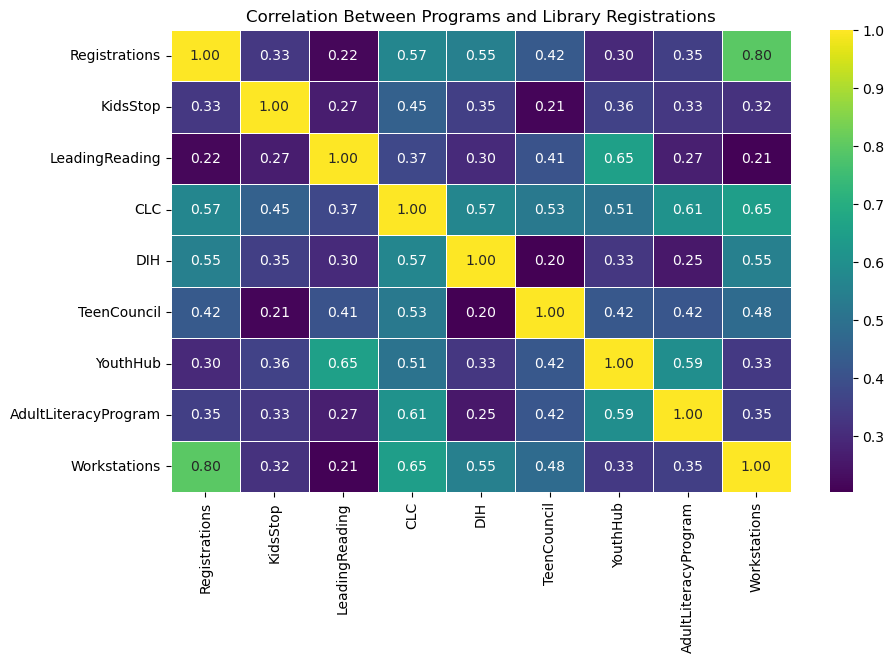

In [9]:
# Create a correlation matrix to analyze relationships between registrations and available programs.
correlation_matrix = physical_library[['Registrations', 'KidsStop', 'LeadingReading', 'CLC', 'DIH',
                                       'TeenCouncil', 'YouthHub', 'AdultLiteracyProgram','Workstations']].corr()


#  heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True,  cmap="viridis", fmt=".2f", linewidths=0.5)
plt.title("Correlation Between Programs and Library Registrations")
plt.show()